In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import sc_AHM
from tblib import plotting
from tblib import superfluid as sf

reload(lattice)
reload(hamiltonian)
reload(sf)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

# Superfluid Weight at T=0K
- get superfluid weight tensor $D$ and $D_s(0)=\sqrt{det D}$
- $D_{\mu, \nu}^s=\sum_{\vec{k},i,j}\frac{n(E_j)-n(E_i)}{E_i-E_j}(\langle\Psi_i|\partial_{\mu}H|\Psi_j\rangle\langle\Psi_j|\partial_{\nu}H|\Psi_i\rangle-\langle\Psi_i|\partial_{\mu}H\gamma^z|\Psi_j\rangle\langle\Psi_j|\gamma^z\partial_{\nu}H|\Psi_i\rangle)$
    - $\implies D_{\mu, \nu}^s=\sum \text{prefactor}\times(\text{diamagnetic part}-\text{paramagnetic part})$
    - plot contribution of prefactor, diamagnetic and paramagnetic term over k-space (0 to 2pi) for any energy pair


In [93]:
ham = hamiltonian.dDSLmodel(N=2, delta=[1,1], T=0, ns=[0.5,0.5], nu=3, U=[4,4], mu=[-2,-2])
dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=41,HF=True, alpha=0.3, Nmin=10, Nmax=1200)

In [94]:
s=41
sfw, term = sf.SFW(ham,s)
sf.detSFW(ham,s)

(array([[3.35160264e-01-2.16312750e-34j, 2.14841013e-18+4.42355387e-35j],
        [1.50983698e-18+2.85393815e-35j, 3.35160264e-01+1.94166626e-34j]]),
 (0.3351602644770504-1.1073061996745709e-35j))

In [95]:
sfw

(0.3351602644770502-2.1631275005302135e-34j)

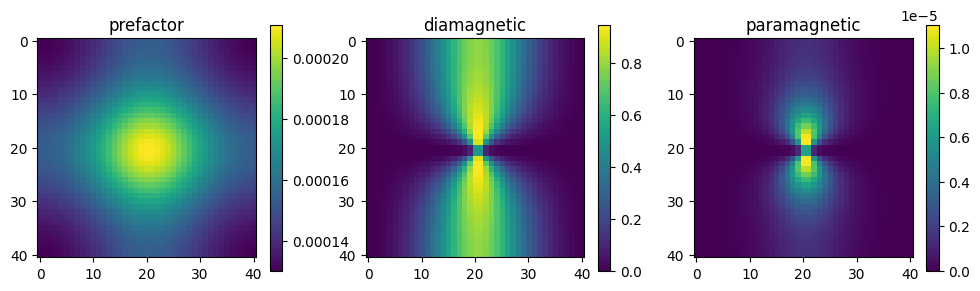

In [102]:
ep = 19 # energy pair 
pfgrid = term[:,0,ep].reshape(s,s)
diam = term[:,1,ep].reshape(s,s)
param = term[:,2,ep].reshape(s,s)

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,16))
axes[0].set_title('prefactor')
axes[1].set_title('diamagnetic')
axes[2].set_title('paramagnetic')
ax0 = axes[0].imshow(np.abs(pfgrid))
ax1 = axes[1].imshow(np.abs(diam))
ax2 = axes[2].imshow(np.abs(param))
fig.colorbar(ax0, shrink=0.2)
fig.colorbar(ax1, shrink=0.2)
fig.colorbar(ax2, shrink=0.2)
plt.show()

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


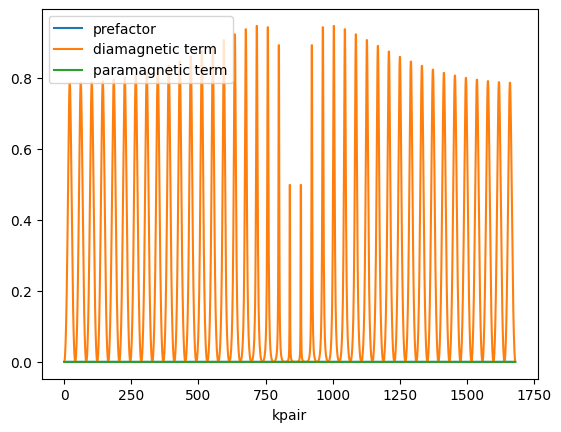

In [97]:
plt.xlabel('kpair')
plt.plot(term[:, 0, 19], label='prefactor')
plt.plot(term[:, 1, 19], label='diamagnetic term')
plt.plot(term[:, 2, 19], label='paramagnetic term')
plt.legend()

In [53]:
Earr = np.linspace(-3,3,101)
farr = []
dfarr = []
for i in Earr:
    farr.append(sf.fermidirac(i,0))
    dfarr.append(sf.fermidirac(i,0, o=1))

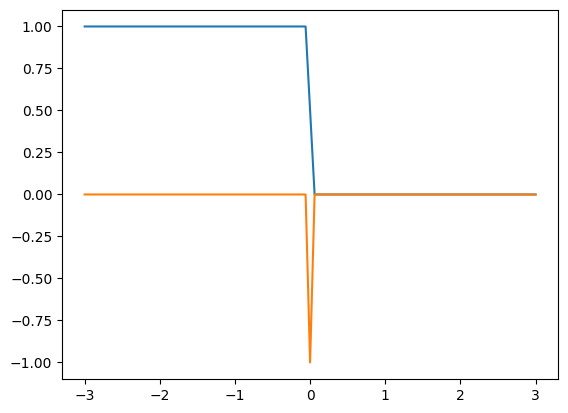

In [60]:
plt.plot(Earr, farr)
plt.plot(Earr, np.array(dfarr)/1e10)

# finite T

In [108]:
ham = hamiltonian.dDSLmodel(N=2, T=0, delta=[1,1], ns=[0.5,0.5], nu=3, U=[1,1], mu=[-1,-1])
dels, nus, mus = sc_AHM.self_consistency_loop(ham, nk=40,HF=True, alpha=0.7, Nmin=10, Nmax=1200)

In [109]:
m=-0.5
N=2
delta = []
sfw = []
tarr = np.linspace(0,0.2,30)
for t in tarr:
    ham = hamiltonian.dDSLmodel(N=N, delta=[1,1], T=t, U=[1,1], nu=3, ns=[1,1], mu=[m,m])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=150, g=1e-6)
    ten, dsfw = sf.detSFW(ham,41)
    delta.append(dels[:,-1])
    sfw.append(dsfw)
    print(f"{t} is Done")

0.0 is Done


c:\Users\atsch\Desktop\MasterVorlesungen\Masterthesis\Code\tests\..\tblib\superfluid.py:19: RuntimeWarning: overflow encountered in double_scalars
  nE = -1/((1+np.exp(E/T))**2)*np.exp(E/T)/T


0.006896551724137932 is Done
0.013793103448275864 is Done
0.020689655172413796 is Done
0.027586206896551727 is Done
0.03448275862068966 is Done
0.04137931034482759 is Done
0.048275862068965524 is Done
0.055172413793103454 is Done
0.062068965517241385 is Done
0.06896551724137932 is Done
0.07586206896551725 is Done
0.08275862068965519 is Done
0.08965517241379312 is Done
0.09655172413793105 is Done
0.10344827586206898 is Done
0.11034482758620691 is Done
0.11724137931034484 is Done
0.12413793103448277 is Done
0.1310344827586207 is Done
0.13793103448275865 is Done
0.14482758620689656 is Done
0.1517241379310345 is Done
0.15862068965517243 is Done
0.16551724137931037 is Done
0.1724137931034483 is Done
0.17931034482758623 is Done
0.18620689655172415 is Done
0.1931034482758621 is Done
0.2 is Done


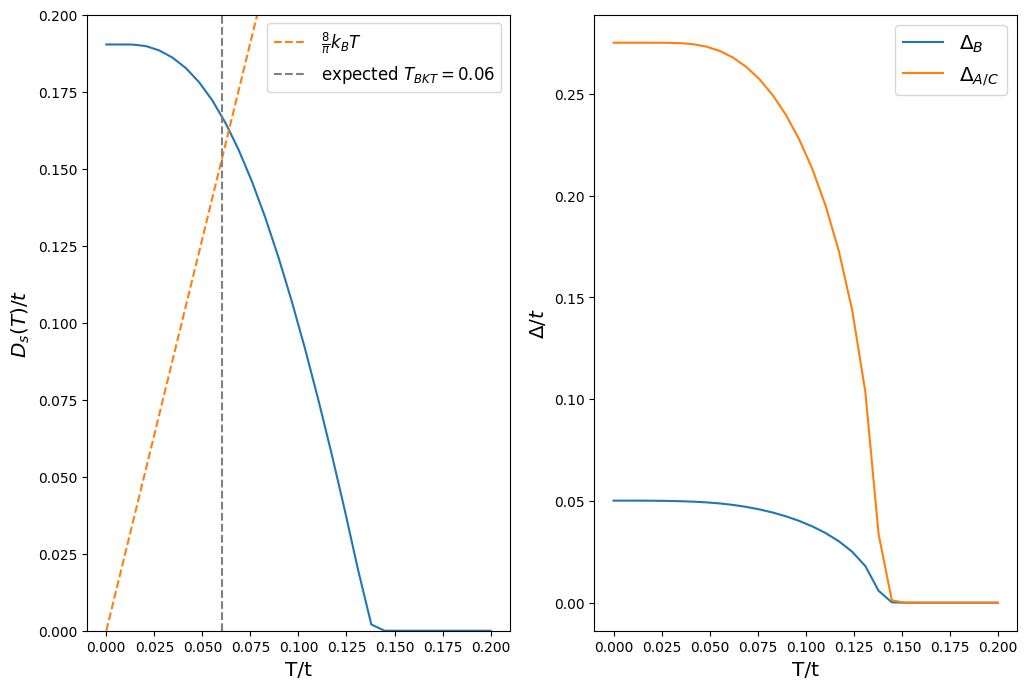

In [113]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,8))
axes[0].set_xlabel('T/t', size='x-large')
axes[1].set_xlabel('T/t', size='x-large')
axes[0].set_ylabel(r'$D_s(T)/t$', size='x-large')
axes[1].set_ylabel(r'$\Delta/t$', size='x-large')
axes[0].set_ylim(0,0.2)

axes[0].plot(tarr, sfw)
axes[0].plot(tarr, tarr*8/np.pi, linestyle='--', label=r'$\frac{8}{\pi}k_BT$')
axes[1].plot(tarr, delta, label=[r'$\Delta_B$',r'$\Delta_{A/C}$'])
axes[0].vlines(0.06, 0,0.2,linestyle='--', color='grey', label=r'expected $T_{BKT}=0.06$')

axes[0].legend(fontsize='large')
axes[1].legend(fontsize='x-large')
plt.show()